# Introduction to quantitative trait loci (QTL) mapping
#### Webinar for Quantitative Genetics Tools  
#### NIDA Center of Excellence in Omics, Systems Genetics, and the Addictome

Saunak Sen  
Professor and Chief of Biostatistics  
Department of Preventive Medicine  
University of Tennessee Health Science Center  
sen@uthsc.edu ~ @saunaksen ~ http://www.senresearch.org

2020-05-08  

Please mute your speakers to reduce any ambient noise that may interfere with others hearing.  

Please ask questions using the chat option at the bottom of your screen.

# Goals

- What is a quantitative trait locus (QTL)? Why are we interested in them?
- What are genome scans and how do they help find QTL?
- What are the strengths and limitations of QTL mapping?

# What is a QTL and why are we interested in them?

# Why use rodent models

- Mammals, share a lot of DNA with humans
- Many strains mimic human phenotype
- Short lifecycle, small size, suitable for genetic manipulation
- Abundant genetic resources (strains, outbred populations)
- Some studies/interventions not feasible/ethical in humans

# Quantitative trait

- Blood pressure, body weight
- Qualitative traits such as coat color can also be treated as quantitative

# F2 cross between F344 and WKY rats (Solberg et. al. 2009)

Wistar–Kyoto (WKY) rat exhibits physiological and behavioral similarities to endophenotypes of
human depression. A series of study were conducted to examine the genetic connections between behavior and physiology.

![F344](https://www.criver.com/sites/default/files/2017-11/F344_Rat_417x235_0.jpg) ![WKY](https://www.criver.com/sites/default/files/2017-11/DahlSSRat_417x235_3.jpg)

Solberg Woods LC, Ahmadiyeh N, Baum A, Shimomura K, Li Q, Steiner DF, Turek FW, Takahashi JS, Churchill GA, Redei EE. Identification of genetic loci involved in diabetes using a rat model of depression. Mamm Genome. 2009 Aug;20(8):486-97.

Fig credit: Charles River

In [1]:
library(qtl)
solbergURL <- "https://phenomedoc.jax.org/QTL_Archive/solberg_2004/Solberg2004_F344xWKY_Data.csv"
solberg <- read.cross(file=solbergURL,format="csv",genotypes=c("a","h","b","c","d"),crosstype="f2",alleles=c("F344","WKY"))
solberg <- jittermap(solberg)

 --Read the following data:
	 486  individuals
	 112  markers
	 25  phenotypes


Warning message in fixXgeno.f2(cross, alleles):
“ --Omitted 1 additional X chr genotype(s).”
Warning message in summary.cross(cross):
“Some markers at the same position on chr 6; use jittermap().”


 --Cross type: f2 


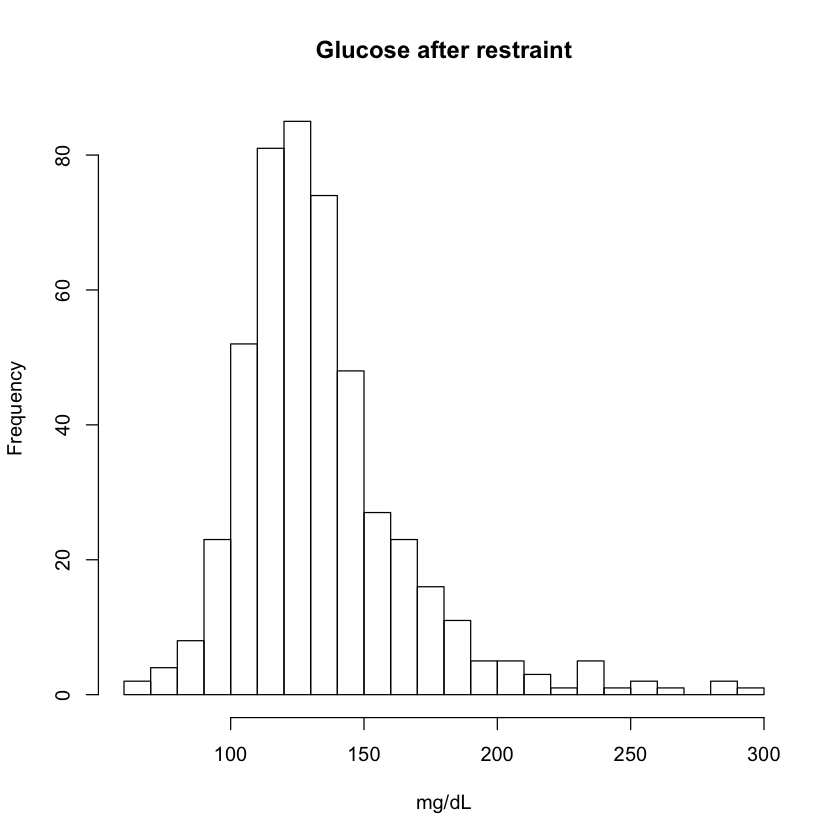

In [2]:
hist(solberg$pheno$glucose30,nclass=20,main="Glucose after restraint",xlab="mg/dL")

Loading required package: sm

Package 'sm', version 2.2-5.6: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




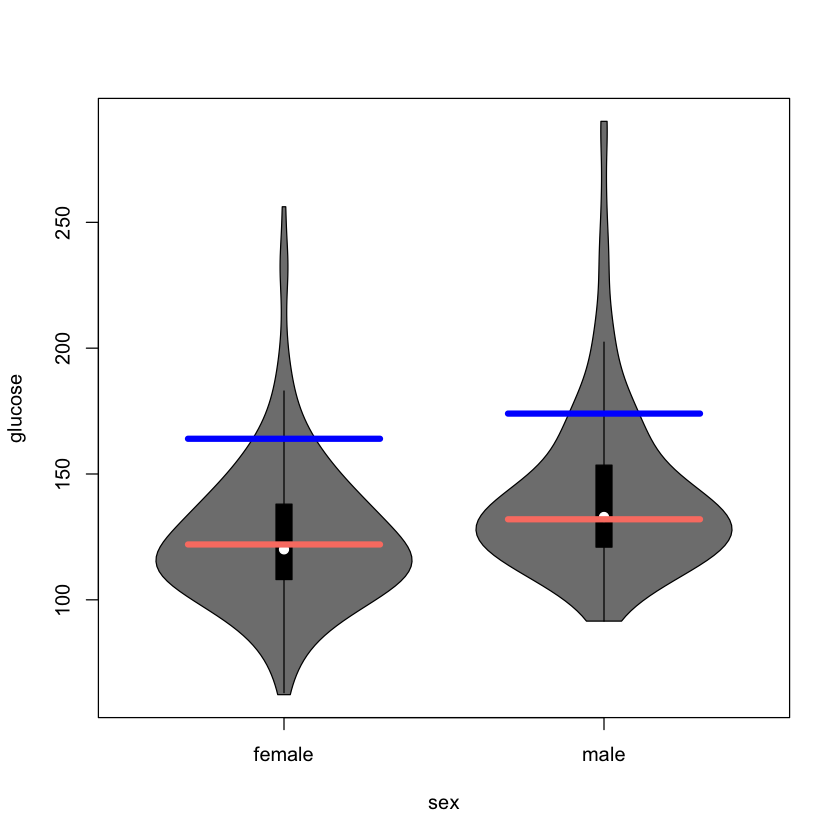

In [3]:
library(vioplot)
vioplot((solberg$pheno$glucose30)~solberg$pheno$sex,
        xlab="sex",ylab="glucose",
       names=c("female","male"))

lines(c(1.7,2.3),c(174,174),col="blue",lwd=5)
lines(c(1.7,2.3),c(132,132),col="salmon",lwd=5)

lines(c(0.7,1.3),c(164,164),col="blue",lwd=5)
lines(c(0.7,1.3),c(122,122),col="salmon",lwd=5)

 --Read the following data:
	 89  individuals
	 251  markers
	 224  phenotypes


Warning message in summary.cross(cross):
“Some markers at the same position on chr 1,3,9; use jittermap().”


 --Cross type: bc 


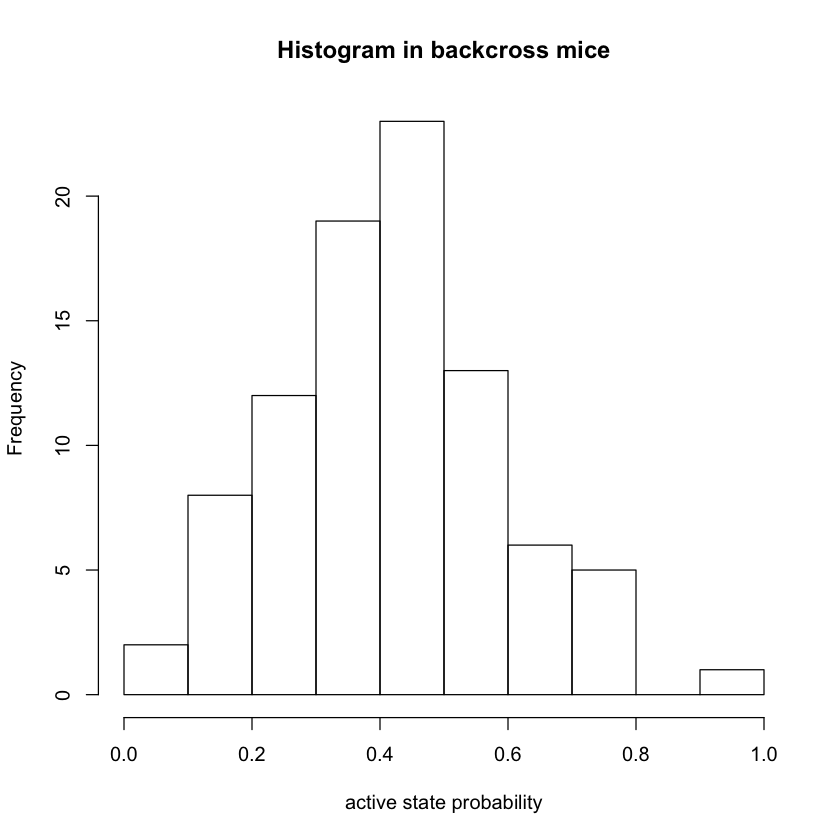

In [4]:
xiong <- read.cross(file="https://phenomedoc.jax.org/QTL_Archive/xiong_2011/Xiong2011_129xB6_BC_B37_Data.csv",format="csv")
hist((xiong$pheno[,100]),xlog=T,xlab="active state probability",main="Histogram in backcross mice")

# How to establish causation

- Method of difference (JS Mill)  Eg. Congenic mouse strain.

> If the phenotype is observed under identical experimental conditions
> in the congenic, but not in the background strain, then the genetic
> variants in the congenic region are the cause, or a necessary part of
> the cause, of the phenotype.

- Randomization (RA Fisher) Eg. Randomized clinical trials.

> If the treatment is randomized to subjects, and the treated subjects
> are observed to have different outcomes compared to the control
> subjects, then the treatment must be the cause of the different
> outcomes.

(Rosenbaum PR 2005).



# Experimental crosses

If two inbred rat strains show consistent difference in a
phenotype in the same environment, we know the difference must
be genetic.

By crossing two rat strains we can create a population of
(approximately) randomly shuffled genomes.

Association between phenotype and genotype may be interpreted to
be causal.

Examples include, backcross and intercross populations,
heterogeneous stock, recombinant inbred lines.

# Intercross and heterogeneous stock

![CrossFigure](https://secureservercdn.net/198.71.233.138/uh7.aba.myftpupload.com/wp-content/uploads/2014/11/HSratsFig1.png)

Credit: [Ratgenes.org](https://ratgenes.org/cores/core-b/)

# Causal diagram


      Meiosis -----> QTL ---------> Phenotype
         |           :                 :
         |           :                 :
          -------> Marker .............:          

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _causes_ the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.

Since the QTL is not directly observable, we test for association between genetic markers and phenotype (trait).  The markers associated with the trait are likely to be physically close to the QTL (idea of genome scan).

# Causal diagram: covariate

          -------> Marker .............
         |           |                 :
         |           |                 :
      Meiosis -----> QTL ---------> Phenotype
                                       ^
                                       |                  
                  Covariate -----------

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _contributes_ to the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.
- Covariate _contributes_ to the phenotype.
- Covariate is _causally unconnected_ to the QTL.  Examples: Sex, intervention/treatment.

# Causal diagram: mediator


          -------> Marker .............
         |           |                 :
         |           |                 :
      Meiosis -----> QTL ---------> Phenotype
                     |                 ^
                     |                 |                  
                  Mediator ------------


- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _contributes_ to the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.
- Mediator _contributes_ to the phenotype.
- QTL also _contributes_ to the mediator.  Mediator _contributes_ to the phenotype. Examples: Body weight.

# Marker genotypes

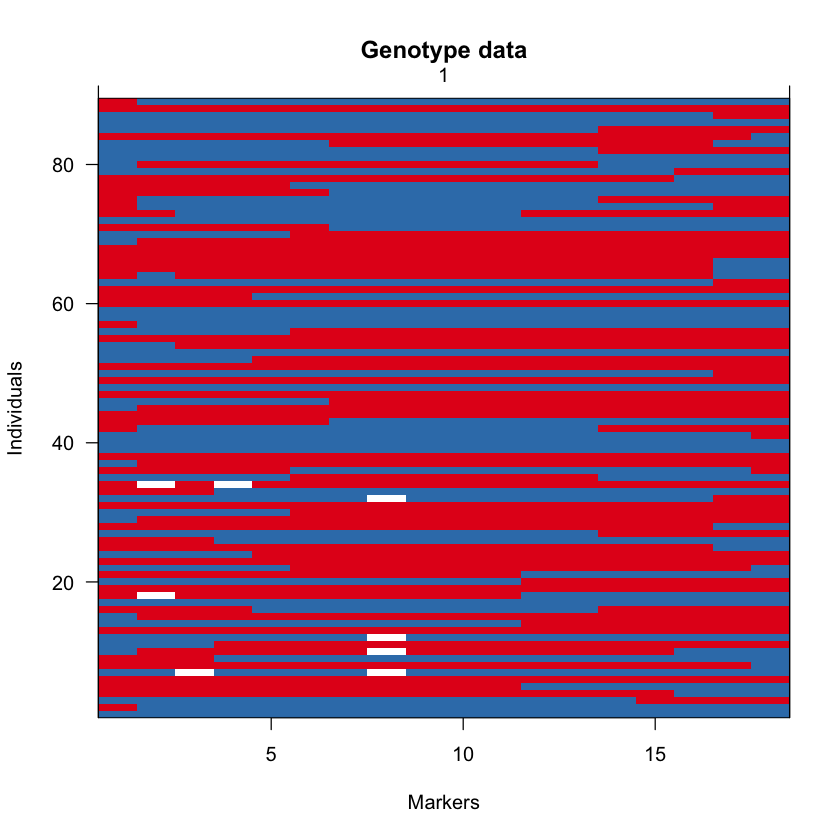

In [5]:
geno.image(xiong,chr=1)

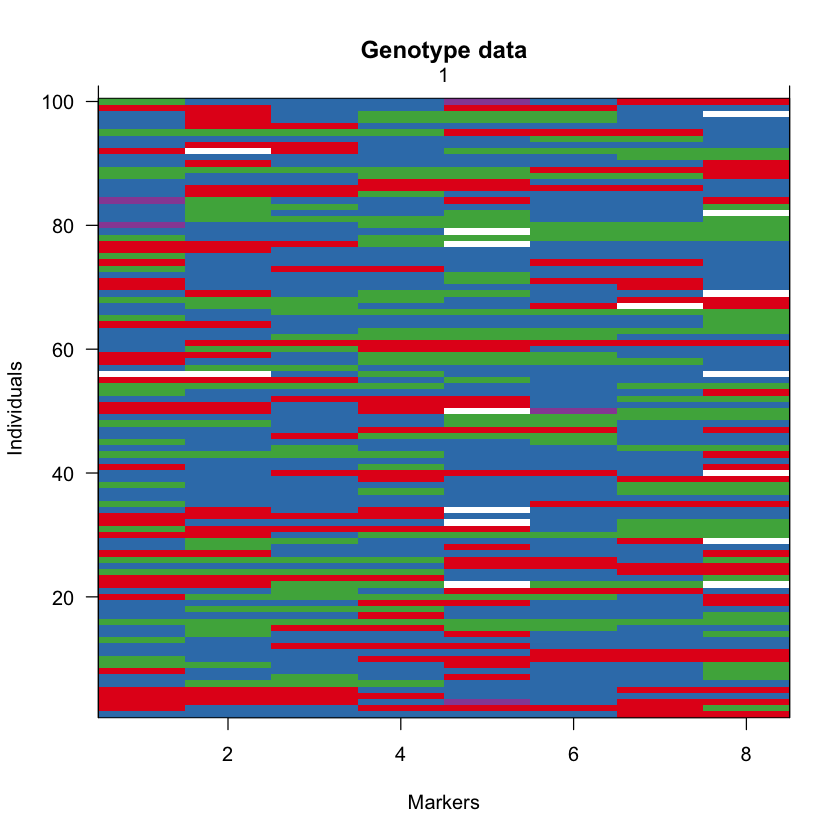

In [6]:
geno.image(subset(solberg,ind=1:100),chr=1)

# Marker genotypes

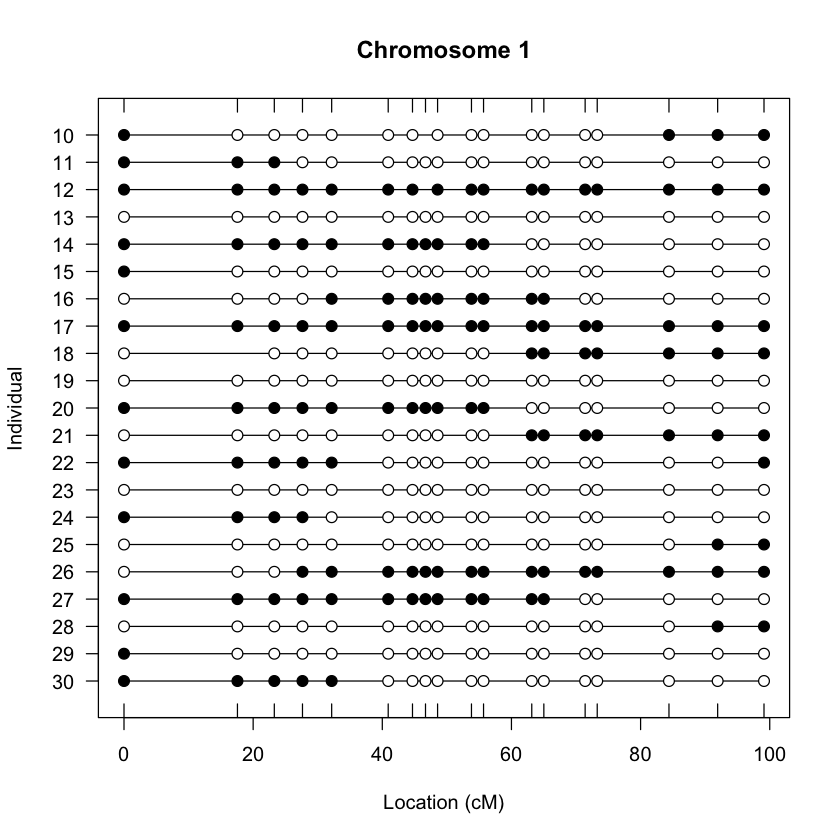

In [7]:
suppressWarnings(plotGeno(xiong,chr=1,include.xo = FALSE,ind=10:30))

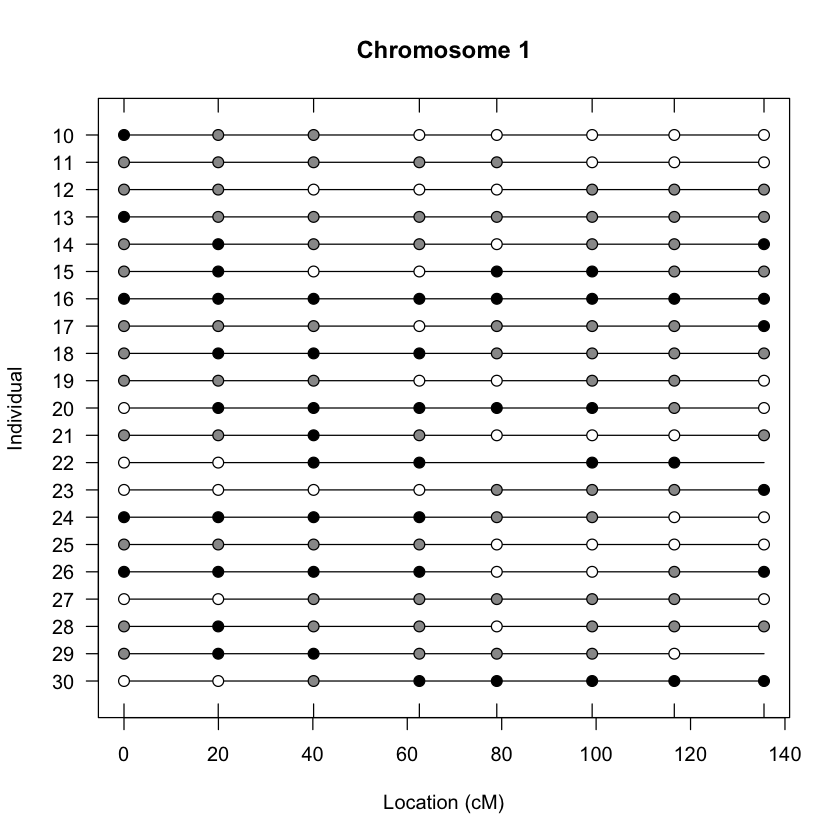

In [8]:
suppressWarnings(plotGeno(solberg,chr=1,include.xo = FALSE,ind=10:30))

# Quantitative trait locus (QTL)

A region of the genome (locus) that contributes to variation in a quantitative trait.

Experimental crosses provide strong evidence of causation.

Finding a QTL is usually the first step in dissecting the cause of the trait variation.

# How do we find QTL?

     Meiosis -----> QTL ---------> Phenotype
         |           :                 :
         |           :                 :
          -------> Marker .............:        

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _causes_ the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.

Since the QTL is not directly observable, we test for association between genetic markers and phenotype (trait).  The markers associated with the trait are likely to be physically close to the QTL (idea of genome scan).

# Strengths and limitations of QTL mapping

- Randomized genomes of experimental crosses allow us to infer causal genetic elements (QTL)
- We infer QTL by scanning the genome for genetic markers associated with a trait of interest

# Some things to keep in mind

- Choose a genetic cross population depending on constraints of your study (QTL study design)
- Due care should be exercised in data analysis
   - Examine traits, covariates, mediators; transform them if needed; investigate/handle outliers
   - Examine genetic markers for marker order, errors; impute if needed (EM algorithm, multiple imputation)
   - Think carefully about causal structure: covariates and mediators
- Genome scan is (linear) regression multiplexed over all markers (and pseudomarkers)
   - Make appropriate adjustments for multiple testing (permutations, stratified permutations)
   - Make adjustments for genetic relatedness, if needed (LMMs, linear mixed models)
- X chromosome needs special care
- Any selection based on trait will require adjustments to analysis strategy

# Caveats

- QTL will get you "close" but will typically not give you _a_ gene
- You may have to leverage several lines of information to nail down a causal genetic element
- All QTL have a context (the genetic background, experimental conditions, laboratory (or wild) environment

# References

- Lander and Botstein (1989) Mapping mendelian factors underlying quantitative traits using RFLP linkage maps. Genetics. 1989 Jan;121(1):185-99.
- Churchill and Doerge (1994) Empirical threshold values for quantitative trait mapping. Genetics. 1994 Nov;138(3):963-71.
- Sen and Churchill (2001) A statistical framework for quantitative trait mapping. Genetics. 2001 Sep;159(1):371-87.
- Broman et. al. (2003) R/qtl: QTL mapping in experimental crosses. Bioinformatics. 2003 May 1;19(7):889-90.
- Broman et. al. (2006) The X chromosome in quantitative trait locus mapping. Genetics. 2006 Dec;174(4):2151-8.
- Sloan et al, (2016), GeneNetwork: framework for web-based genetics, Journal of Open Source Software, 1(2), 25, doi:10.21105/joss.00025